# Guía 2: Ecuaciones diferenciales ordinarias

## Aspectos teóricos

1. Escriba la ecuación del método de Euler y derive de allí con la expansión de Taylor un método con un orden de error mayor para la siguiente ecuación: $$\frac{dy}{dx} = f(x, y).$$
2. Deduzca los métodos de Runge-Kutta de segundo orden.

## Ejercicios de programación

1. Escriba una serie de códigos para integrar la ecuación diferencial $$\frac{dy}{dx} = - x y$$ con $x_0 = 0$, $x_f = 3$ e $y(0) = 1$, mediante los métodos de Euler y Runge-Kutta 2. Compare los errores cometidos por cada uno de ellos en la estimación de $y(3)$, usando distintos valores de $h$. ¿Concuerdan los errores obtenidos con el orden del error estimado?

In [1]:
import matplotlib.pyplot as plt
import numpy as np

def exacta(x):
    return np.exp(-np.asarray(x)**2 / 2)

def f(x, y):
    return - x * y

def euler(x0, y0, h, xf):
    while(x0 <= xf):
        y = y0 + h * f(x0, y0)
        y0 = y
        x0 += h
        
    return y

def rk2(x0, y0, h, xf):
    while(x0 <= xf):
        k1 = h * f(x0, y0)
        k2 = h * f(x0 + h, y0 + k1)
        
        y = y0 + 0.5 * (k1 + k2)
        y0 = y
        x0 += h
        
    return y

x0 = 0
xf = 3
y0 = 1
y_true = exacta(xf)
for h in np.logspace(-1, -7, num=7):
    yeul = euler(x0, y0, h, xf)
    yrk2 = rk2(x0, y0, h, xf)
    
    print(f"{h:.2e}, {np.abs(y_true - yeul):.6e}, {np.abs(y_true - yrk2):.6e}")

1.00e-01, 3.317899e-03, 4.528140e-04
1.00e-02, 6.565296e-04, 3.251087e-04
1.00e-03, 6.655399e-05, 3.324509e-05
1.00e-04, 3.332699e-06, 3.749846e-10
1.00e-05, 3.332700e-07, 3.649862e-12
1.00e-06, 3.332657e-08, 4.608137e-13
1.00e-07, 6.659865e-09, 3.327166e-09


2. Usando RK4, escribir un código para integrar el siguiente sistema de educaciones diferenciales de primer orden acopladas $$\frac{dx}{dt} = x - xy$$ $$\frac{dy}{dt} = xy - y.$$ Este sistema es conocido como el modelo de Lotka-Volterra ([libro](https://searchworks.stanford.edu/view/941805)) y fue propuesto en el año 1920 con el objeto de ser aplicado al estudio de variaciones en las poblaciones de sistemas predador-presa. También ha sido usado como mecanismo de la reacción química modelo $$A + X \rightarrow X$$ $$X + Y \rightarrow 2 Y$$ $$Y \rightarrow B$$ Nótese que el sistema de ecuaciones de Lotka-Volterra implica que la concentración de A es independiente del tiempo y que $k_1 A = k_2 = k_3 = 1$. En este ejercicio esbozaremos el "retrato de fases" de este interesante sistema dinámico. Para ello comenzaremos enumerando los puntos fijos del sistema de ecuaciones de Lotka-Volterra: existe un punto fijo trivial en (0, 0) y uno no trivial en (1, 1). Mediante un análisis de estabilidad lineal puede determinarse que el primero es un punto de ensilladura, mientras que el segundo es un centro. Además puede demostrarse que este sistema admite una constante de movimiento $$C = (X + Y) - \ln(X) - \ln(Y)$$ Integre el sistema de ecuaciones diferenciales con un valor adecuado de $\Delta t$, grafique las trayectorias correspondientes en el espacio de las fases (plano (X, Y)), grafique los valores de $X$ e $Y$ en función de $t$. Compruebe que la estabilidad de los puntos fijos es la mencionada anteriormente. Compruebe que $C$ es una cantidad conservada durante la evolución temporal del sistema. ¿Cómo afecta $\Delta t$ a la conservación de $C$?

In [2]:
import numpy as np

def funcs(t, x):
    return np.array([])

def rk4_step(x, h):
    k1 = h * funcs(t, x)
    k2 = h * funcs(t + h / 2, x + 0.5 * k1)
    k3 = h * funcs(t + h / 2, x + 0.5 * k2)
    k4 = h * funcs(t + h, x + k3)

    new_x = x + (k1 + 2 * (k2 + k3) + k4) / 6

    return new_x

In [3]:
import matplotlib.pyplot as plt

def funcs(t, x):
    f1 = x[0] - x[0] * x[1]
    f2 = x[0] * x[1] - x[1]
    return np.array([f1, f2])

# Parámetros iniciales
x0 = [0.5, 0.5]
t0 = 0.0
t_final = 20.0
h = 0.01  # Tamaño del paso

# Listas para almacenar los resultados
t_values = [t0]
x_values = [x0[0]]
y_values = [x0[1]]

# Integración utilizando RK4
t = t0
x = x0
while t < t_final:
    x = rk4_step(x, h)
    t += h
    t_values.append(t)
    x_values.append(x[0])
    y_values.append(x[1])

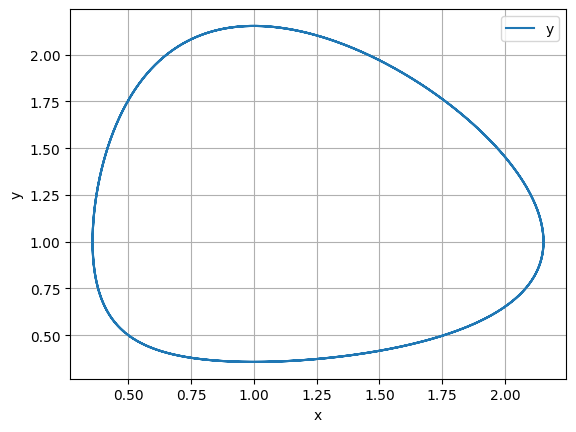

In [4]:
plt.plot(x_values, y_values, label='y')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid()
plt.show()

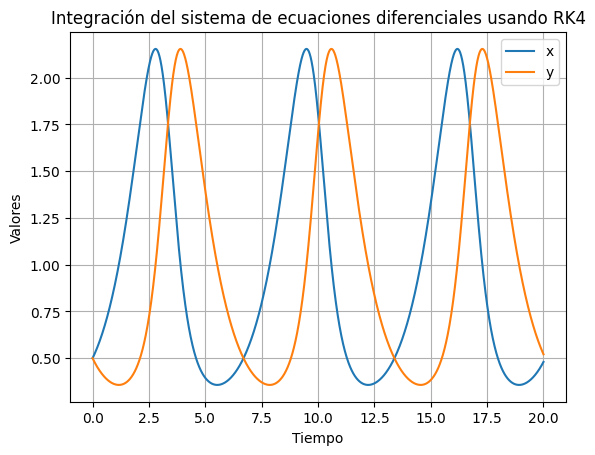

In [5]:
plt.plot(t_values, x_values, label='x')
plt.plot(t_values, y_values, label='y')
plt.xlabel('Tiempo')
plt.ylabel('Valores')
plt.title('Integración del sistema de ecuaciones diferenciales usando RK4')
plt.legend()
plt.grid()
plt.show()

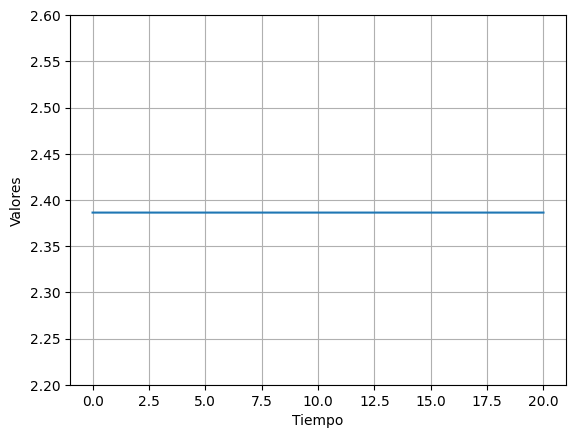

In [6]:
plt.plot(t_values, np.array(x_values) + np.array(y_values) - np.log(x_values) - np.log(y_values))
plt.ylim((2.2,2.6))
plt.xlabel('Tiempo')
plt.ylabel('Valores')
plt.grid()
plt.show()

3. Modifique el código anterior e integre el sistema de ecuaciones $$\frac{dp_x}{dt} = - \gamma_x x$$ $$\frac{dx}{dt} = p_x $$ $$\frac{dp_y}{dt} = - \gamma_y y$$ $$\frac{dy}{dt} = p_y$$ que describe el movimiento de dos osciladores armónicos desacoplados. Use como condiciones iniciales $p_x = 0$, $p_y = 0$, $x = 2$ e $y = 2$, integre las ecuaciones de movimiento usando valores de $\gamma_x$ y $\gamma_y$ tales como un caso $\sqrt{\frac{\gamma_x}{\gamma_y}}$ sea un número racional (ej $1/2$) mientras que en otro sea un número irracional (ej $1/\sqrt{2}$). Grafique las trayectorias en el plano (x, y) y compare los resultados en ambos casos. Grafique también las trayectorias de los dos osciladores por separado (ej plano (p$_x$, x) o (p$_y$, y)), y compare con el resultado exacto. Mayor información sobre este sistema dinámico puede obtenerse en [este libro](https://www.wiley.com/en-us/Molecular+Dynamics+Simulation%3A+Elementary+Methods-p-9780471184393), capítulo 2.

In [7]:
def funcs(t, x):
    f1 = - x[1] / 2
    f2 = x[0]
    f3 = - x[3]
    f4 = x[2]
    return np.array([f1, f2, f3, f4])

# Parámetros iniciales
x0 = [0, 2, 0, 2]
t0 = 0.0
t_final = 50.0
h = 0.01  # Tamaño del paso

# Listas para almacenar los resultados
t_values = [t0]
px_values = [x0[0]]
x_values = [x0[1]]
py_values = [x0[2]]
y_values = [x0[3]]

# Integración utilizando RK4
t = t0
x = x0
while t < t_final:
    x = rk4_step(x, h)
    t += h
    t_values.append(t)
    px_values.append(x[0])
    x_values.append(x[1])
    py_values.append(x[2])
    y_values.append(x[3])

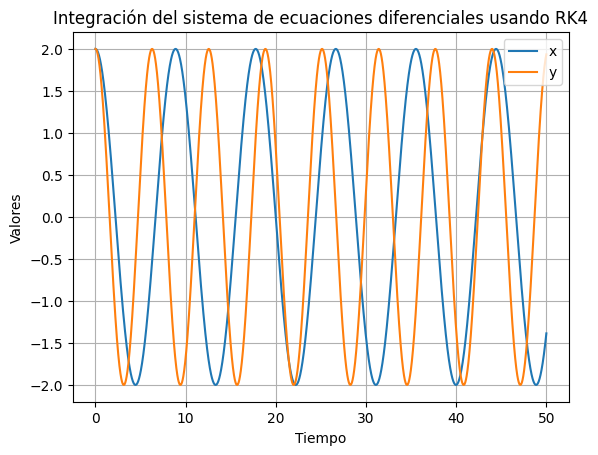

In [8]:
plt.plot(t_values, x_values, label='x')
plt.plot(t_values, y_values, label='y')
plt.xlabel('Tiempo')
plt.ylabel('Valores')
plt.title('Integración del sistema de ecuaciones diferenciales usando RK4')
plt.legend()
plt.grid()
plt.show()

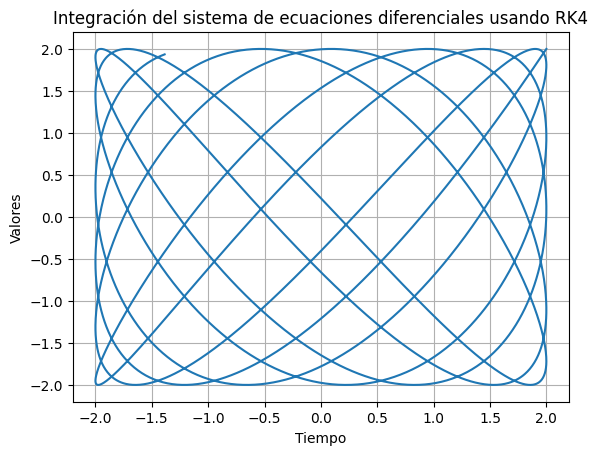

In [9]:
plt.plot(x_values, y_values)
plt.xlabel('Tiempo')
plt.ylabel('Valores')
plt.title('Integración del sistema de ecuaciones diferenciales usando RK4')
plt.grid()
plt.show()

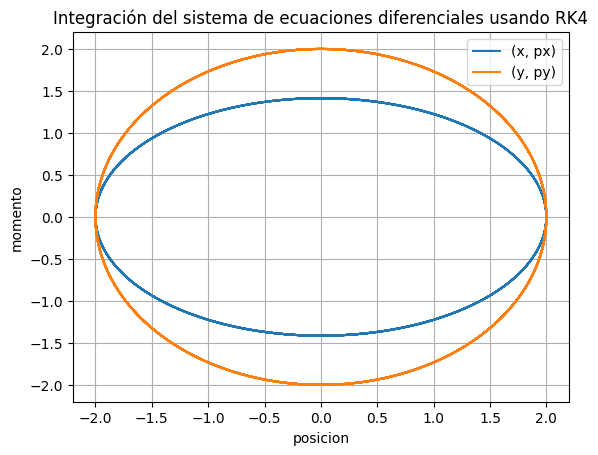

In [10]:
plt.plot(x_values, px_values, label='(x, px)')
plt.plot(y_values, py_values, label='(y, py)')
plt.xlabel('posicion')
plt.ylabel('momento')
plt.title('Integración del sistema de ecuaciones diferenciales usando RK4')
plt.legend()
plt.grid()
plt.show()

4. Integre en forma numérica el siguiente sistema de ecuaciones diferenciales (modelo de Lorenz). Use para ello el código del ejercicio 2. $$\frac{dx}{dt} = 10 (y - x)$$ $$\frac{dy}{dt} = x (r - z) - y$$ $$\frac{dz}{dt} = x y - \frac{8}{3} z$$

In [11]:
def funcs(t, x):
    r = ...
    
    fx = 10 * (x[1] - x[0])
    fy = x[0] * (r - x[2]) - x[1]
    fz = x[0] * x[1] - 8 * x[2] / 3
    
    return np.array([fx, fy, fz])

a. Corra el código para valores de $r$ menores que 1 ($r < 1$), usando como condición inicial algún punto en las proximidades de (0, 0, 0).

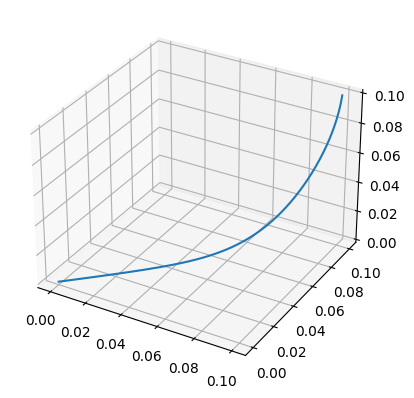

In [12]:
def funcs(t, x):
    r = 0.5
    
    fx = 10 * (x[1] - x[0])
    fy = x[0] * (r - x[2]) - x[1]
    fz = x[0] * x[1] - 8 * x[2] / 3
    
    return np.array([fx, fy, fz])

# Parámetros iniciales
x0 = [0.1, 0.1, 0.1]
t0 = 0.0
t_final = 50.0
h = 0.01  # Tamaño del paso

# Listas para almacenar los resultados
t_values = [t0]
x_values = [x0[0]]
y_values = [x0[1]]
z_values = [x0[2]]

# Integración utilizando RK4
t = t0
x = x0
while t < t_final:
    x = rk4_step(x, h)
    t += h
    t_values.append(t)
    x_values.append(x[0])
    y_values.append(x[1])
    z_values.append(x[2])
    
ax = plt.figure().add_subplot(projection='3d')
ax.plot(x_values, y_values, z_values)
plt.show()

b. Integre nuevamente con valores de $r > 28$ y condiciones iniciales cercanas a (0, 1, 0). Dibuje la trayectoria resultante en el espacio de las fases (3D).

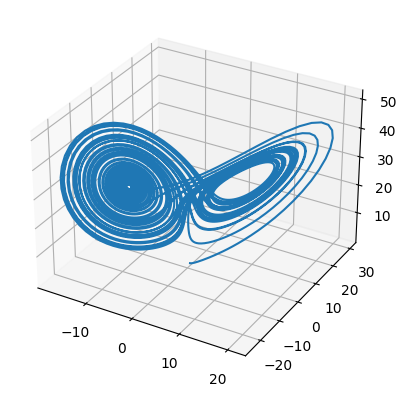

In [13]:
def funcs(t, x):
    r = 30.0
    
    fx = 10 * (x[1] - x[0])
    fy = x[0] * (r - x[2]) - x[1]
    fz = x[0] * x[1] - 8 * x[2] / 3
    
    return np.array([fx, fy, fz])

# Parámetros iniciales
x0 = [0.1, 1.1, 0.1]
t0 = 0.0
t_final = 50.0
h = 0.01  # Tamaño del paso

# Listas para almacenar los resultados
t_values = [t0]
x_values = [x0[0]]
y_values = [x0[1]]
z_values = [x0[2]]

# Integración utilizando RK4
t = t0
x = x0
while t < t_final:
    x = rk4_step(x, h)
    t += h
    t_values.append(t)
    x_values.append(x[0])
    y_values.append(x[1])
    z_values.append(x[2])
    
ax = plt.figure().add_subplot(projection='3d')
ax.plot(x_values, y_values, z_values)
plt.show()

c. Realice dos corridas como las descriptas en el item anterior, pero cambie levemente las condiciones iniciales en una de ellas. Calcule la diferencia en una de las variables a lo largo de la trayectoria $[x_1(t) - x_2(t)]$ y grafique la misma versus $t$. ¿Qué puede concluir sobre a sensibilidad a las condiciones iniciales?

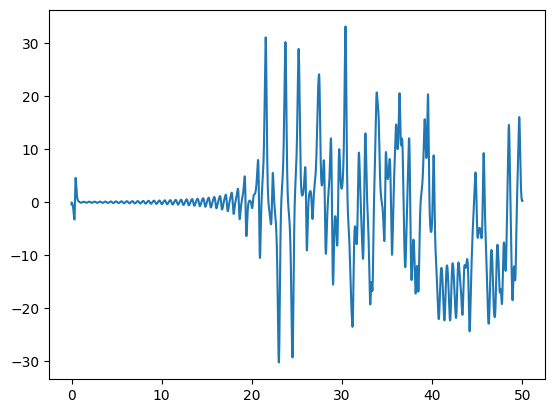

In [14]:
def funcs(t, x):
    r = 30
    
    fx = 10 * (x[1] - x[0])
    fy = x[0] * (r - x[2]) - x[1]
    fz = x[0] * x[1] - 8 * x[2] / 3
    
    return np.array([fx, fy, fz])

# Parámetros iniciales
x0 = [0.0, 1.1, 0.0]
t0 = 0.0
t_final = 50.0
h = 0.01  # Tamaño del paso

# Listas para almacenar los resultados
t_values = [t0]
y_values = [x0[1]]

# Integración utilizando RK4
t = t0
x = x0
while t < t_final:
    x = rk4_step(x, h)
    t += h
    t_values.append(t)
    y_values.append(x[0])
    
# Parámetros iniciales
x0 = [0.0, 1.5, 0.0]
t0 = 0.0
t_final = 50.0
h = 0.01  # Tamaño del paso

# Listas para almacenar los resultados
t_values = [t0]
y_values1 = [x0[1]]

# Integración utilizando RK4
t = t0
x = x0
while t < t_final:
    x = rk4_step(x, h)
    t += h
    t_values.append(t)
    y_values1.append(x[0])
        
plt.plot(t_values, np.array(y_values) - np.array(y_values1))
plt.show()

## Ejercicio adicional (opcional)

Un test riguroso para comprobar la exactitud de la integración numérica consiste en usar el valor final de $y$ obtenido al terminar la integración, como condición inicial para integrar la ecuación diferencial hasta el valor de $x$ de partida; es decir: integrar hacia atrás. Realice esta prueba en la integración de la ecuación del ejercicio 1 con cada uno de los métodos y saque conclusiones sobre las respectivas eficiencias. Por último aplique el test de reversibilidad para distintos valores de $h$.